<a href="https://colab.research.google.com/github/hazra-kerubo/DescriptiveAnalysis/blob/main/IPFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# sns.set_style()

finance = pd.read_csv('/content/Financial Dataset - 1.csv')
finance.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [2]:
#variable definitions
variable_definitions=pd.read_csv('/content/VariableDefinitions (1).csv')
variable_definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [3]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [4]:
# describing data
finance.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [5]:
#checking column names
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [6]:
# checking columns
finance.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [7]:
# checking for unique values
finance.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

1.The research problem is to figure out how we can predict which individuals   are most likely to have or use a bank account.



In [8]:
#checking shape
finance.shape

(23524, 13)

In [9]:
#checking column names
finance.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [10]:
# checking summary of null values
finance.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [11]:
#Dropping missing values
#finance_new =finance.dropna(thresh=len (finance_new.columns)-3) 
#finance_new.shape

In [12]:
# Dropping null values
finance2=finance.dropna()
finance2.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [13]:
#Checking shape after dropping null values
finance2.shape


(23343, 13)

In [14]:
finance2.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [15]:
# checking duplicated values
finance.duplicated().sum()

0

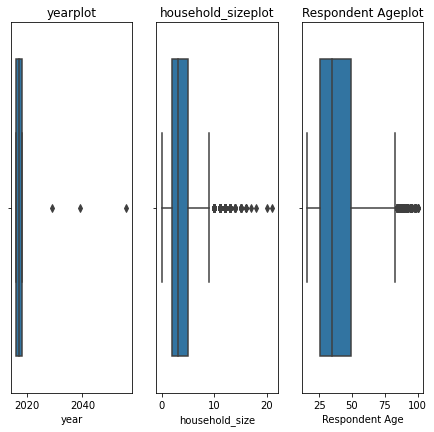

In [16]:
#checking for outliers
#Household
#respondent age\
#year

#finding outliers
target_columns=['year','household_size','Respondent Age',]
plt.figure(figsize=(10,15))
for i in enumerate(target_columns):
  plt.subplot(2,4,i[0]+1)
  sns.boxplot(x=finance2[i[1]])
  plt.title(i[1]+"plot")



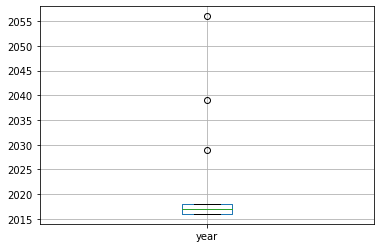

In [17]:
#checking outliers -year
finance2.boxplot("year")
# we have 3 outliers in year colum


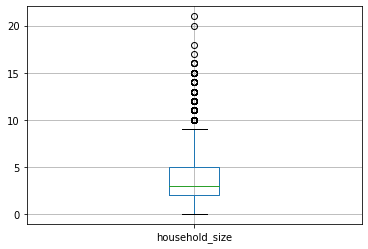

In [18]:
#Checking outliers  for households
finance2.boxplot("household_size")

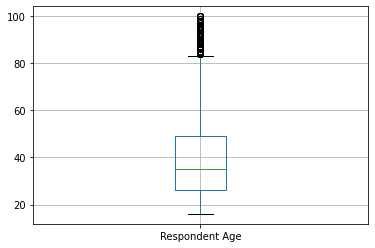

In [19]:
# checking outliers respondent age
finance.boxplot("Respondent Age")

In [20]:
# removing outliers
# decide which method to use to handle outliers
# Check for duplicates/aka handling anomalies
# factor/discriminant analysis

In [23]:
# showing linear correlation-not much linear correlation observed here
finance.corr()

,year,household_size,Respondent Age
year,1.000000,-0.049344,-0.019570
household_size,-0.049344,1.000000,-0.119709
Respondent Age,-0.019570,-0.119709,1.000000


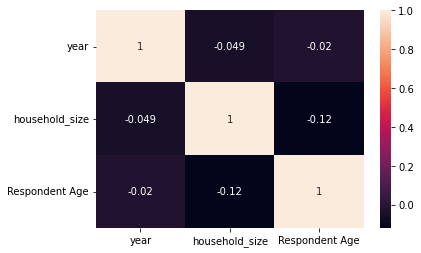

In [24]:
#checking correlations
sns.heatmap(finance.corr(),annot=True)
plt.show()

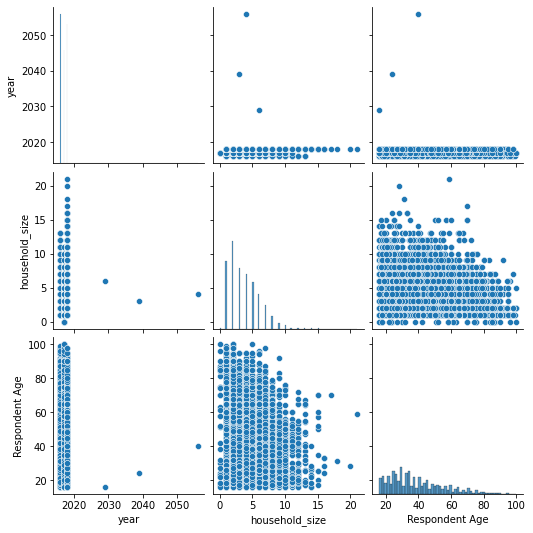

In [25]:
#plotting and showing our observation
sns.pairplot(finance)
plt.show()

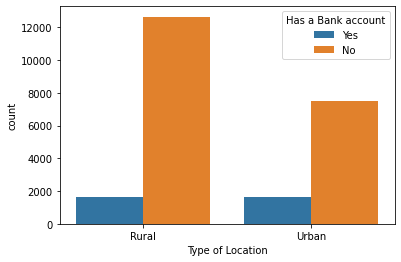

In [26]:
# checkin rural vs urban people with bank account
sns.countplot(x='Type of Location',hue='Has a Bank account',data=finance)

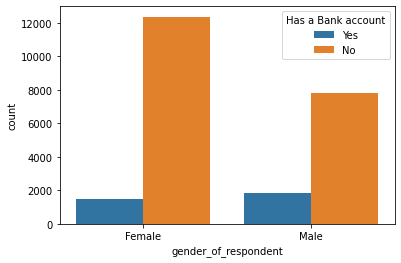

In [56]:
# checkin male vs female poplation with bank account
sns.countplot(x='gender_of_respondent',hue='Has a Bank account',data=finance)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

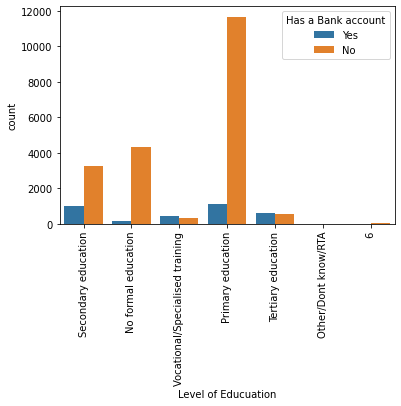

In [27]:
sns.countplot(x='Level of Educuation',hue='Has a Bank account',data=finance)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

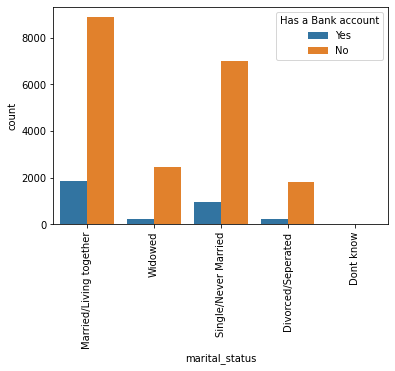

In [28]:
sns.countplot(x='marital_status',hue='Has a Bank account',data=finance)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

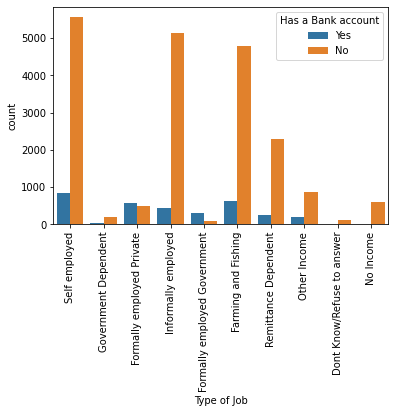

In [29]:
sns.countplot(x='Type of Job',hue='Has a Bank account',data=finance)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


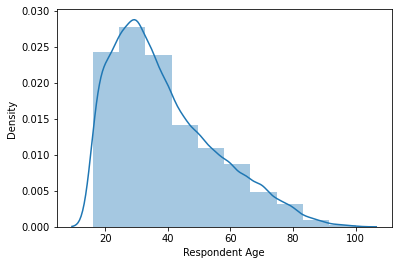

In [30]:
# checking distribuyion of respondent age
sns.distplot(finance['Respondent Age'],bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


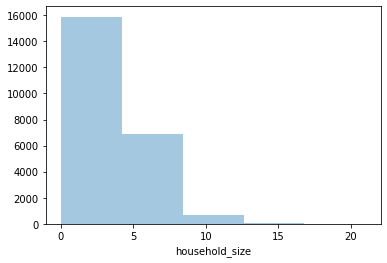

In [31]:
# checking household size distribution
sns.distplot(finance['household_size'],bins=5,kde=False)

In [32]:
# separating continoues and categorical values
catg=finance2.select_dtypes("object")
cont=finance2.select_dtypes("number")

In [33]:
#finance2=finance.drop(['uniqueid'],axis=1,inplace=True) 

In [34]:
finance2=finance.drop(['uniqueid'],axis=1).copy()

In [35]:
finance2

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [36]:
type(finance)

pandas.core.frame.DataFrame

In [37]:
catg.head(5)

,country,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,uniqueid_1,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,uniqueid_4,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,uniqueid_5,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


In [38]:
# numerical variables (cont)
cont

,year,household_size,Respondent Age
0,2018,3.0,24.0
1,2018,5.0,70.0
2,2018,5.0,26.0
3,2018,5.0,34.0
4,2018,8.0,26.0
...,...,...,...
23519,2018,4.0,48.0
23520,2018,2.0,27.0
23521,2018,5.0,27.0
23522,2018,7.0,30.0


In [39]:
finance.keys()

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [40]:
# converting categorical to num
catgclean = pd.get_dummies(catg)
catgclean
 


,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,uniqueid_uniqueid_1,uniqueid_uniqueid_10,uniqueid_uniqueid_100,uniqueid_uniqueid_1000,uniqueid_uniqueid_1001,uniqueid_uniqueid_1002,uniqueid_uniqueid_1003,uniqueid_uniqueid_1004,uniqueid_uniqueid_1005,uniqueid_uniqueid_1006,uniqueid_uniqueid_1007,uniqueid_uniqueid_1008,uniqueid_uniqueid_1009,uniqueid_uniqueid_101,uniqueid_uniqueid_1010,uniqueid_uniqueid_1011,uniqueid_uniqueid_1012,uniqueid_uniqueid_1013,uniqueid_uniqueid_1014,uniqueid_uniqueid_1015,uniqueid_uniqueid_1016,uniqueid_uniqueid_1017,uniqueid_uniqueid_1018,uniqueid_uniqueid_1019,uniqueid_uniqueid_102,uniqueid_uniqueid_1020,uniqueid_uniqueid_1021,uniqueid_uniqueid_1022,uniqueid_uniqueid_1023,uniqueid_uniqueid_1024,uniqueid_uniqueid_1025,uniqueid_uniqueid_1026,uniqueid_uniqueid_1027,uniqueid_uniqueid_1028,uniqueid_uniqueid_1029,uniqueid_uniqueid_103,...,uniqueid_uniqueid_996,uniqueid_uniqueid_997,uniqueid_uniqueid_998,uniqueid_uniqueid_999,Has a Bank account_No,Has a Bank account_Yes,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23520,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
23521,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
23522,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
# merging the converted numerical and converted categorical data
finance3 = pd.concat([catgclean,cont],axis=1)

In [42]:
# previeing merged columns
finance3

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,uniqueid_uniqueid_1,uniqueid_uniqueid_10,uniqueid_uniqueid_100,uniqueid_uniqueid_1000,uniqueid_uniqueid_1001,uniqueid_uniqueid_1002,uniqueid_uniqueid_1003,uniqueid_uniqueid_1004,uniqueid_uniqueid_1005,uniqueid_uniqueid_1006,uniqueid_uniqueid_1007,uniqueid_uniqueid_1008,uniqueid_uniqueid_1009,uniqueid_uniqueid_101,uniqueid_uniqueid_1010,uniqueid_uniqueid_1011,uniqueid_uniqueid_1012,uniqueid_uniqueid_1013,uniqueid_uniqueid_1014,uniqueid_uniqueid_1015,uniqueid_uniqueid_1016,uniqueid_uniqueid_1017,uniqueid_uniqueid_1018,uniqueid_uniqueid_1019,uniqueid_uniqueid_102,uniqueid_uniqueid_1020,uniqueid_uniqueid_1021,uniqueid_uniqueid_1022,uniqueid_uniqueid_1023,uniqueid_uniqueid_1024,uniqueid_uniqueid_1025,uniqueid_uniqueid_1026,uniqueid_uniqueid_1027,uniqueid_uniqueid_1028,uniqueid_uniqueid_1029,uniqueid_uniqueid_103,...,uniqueid_uniqueid_999,Has a Bank account_No,Has a Bank account_Yes,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed,year,household_size,Respondent Age
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2018,3.0,24.0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2018,5.0,70.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2018,5.0,26.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2018,5.0,34.0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2018,8.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2018,4.0,48.0
23520,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2018,2.0,27.0
23521,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2018,5.0,27.0
23522,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2018,7.0,30.0


In [43]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(finance3)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scaledfinance3=scaler.transform(finance3)

In [45]:
scaledfinance3

array([[ 1.68802823, -0.76967563, -0.62122218, ...,  1.13051188,
        -0.30188629, -0.89624712],
       [ 1.68802823, -0.76967563, -0.62122218, ...,  1.13051188,
         0.57487037,  1.88834928],
       [ 1.68802823, -0.76967563, -0.62122218, ...,  1.13051188,
         0.57487037, -0.77517771],
       ...,
       [-0.59240715, -0.76967563, -0.62122218, ...,  1.13051188,
         0.57487037, -0.71464301],
       [-0.59240715, -0.76967563, -0.62122218, ...,  1.13051188,
         1.45162703, -0.53303889],
       [-0.59240715, -0.76967563, -0.62122218, ...,  1.13051188,
         2.76676201, -1.13838594]])

In [46]:
from sklearn.decomposition import PCA

pca=PCA(n_components =20)


In [47]:
newpca=pca.fit_transform(scaledfinance3)

In [48]:
newpca.shape

(23343, 20)

In [49]:
# checking variance
pca.explained_variance_ratio_

array([0.00050365, 0.00043638, 0.00038234, 0.00034453, 0.00029449,
       0.00028346, 0.00023462, 0.00023308, 0.00021612, 0.00021315,
       0.00019996, 0.00018632, 0.00018059, 0.00017163, 0.00016756,
       0.00016658, 0.00015843, 0.00015805, 0.00015293, 0.000145  ])

In [50]:
np.sum(pca.explained_variance_ratio_)

0.004828877372843078